In [6]:
# imports
import random
import os

from PIL import Image
import numpy as np
import pickle
import matplotlib.pyplot as plt

import graphlearning as gl

In [2]:
# Sample N points from the image array at random
def sample(im_array, N=5000): 
    u = im_array.nonzero()
    im_normal = (u[0] / im_array.shape[0], u[1] / im_array.shape[1])
    im_nonzero = np.array(list(map(list, zip(*im_normal)))) # nonzero points in the area
    y = im_nonzero[np.random.choice(im_nonzero.shape[0], N, replace=False), :]
    return y

In [3]:
# Compute Graph Fourier Transform
def GFT(im_points, k=25, r=1000):
    # im_points is sampled points from image, k is number of neighbors, r is number of eigenvalues
    W = gl.weightmatrix.knn(im_points, k)
    #eps = 0.05
    #W = gl.weightmatrix.epsilon_ball(np.array(im_points), eps)
    G = gl.graph(W)
    print("Graph is connected: ", G.isconnected())
    return G.eigen_decomp(k=r,normalization='normalized', method="lowrank")

In [4]:
def compute_evals(input_path):
    save_path = os.path.join(input_path, "eigenvalues")
    try: 
        os.mkdir(save_path)
    except:
        pass
    eval_dict = dict()
    for f in os.listdir(input_path):
        if f != "eigenvalues":
            print(f)
            fname, fext = os.path.splitext(f)
            image = Image.open(os.path.join(input_path, f))
            im_arr = np.array(image)
            im_sample = sample(im_arr)
            evals, _ = GFT(im_sample)
            eval_dict[f] = evals
    return eval_dict

iDC-2-area_smoothed.tif
Graph is connected:  True
iDC-3-area_smoothed.tif
Graph is connected:  True
iDC-5-1-area_smoothed.tif
Graph is connected:  True
iDC-5-2-area_smoothed.tif
Graph is connected:  True
iDC-6-area_smoothed.tif
Graph is connected:  True
iDC-7-area_smoothed.tif
Graph is connected:  True
immature-area_smoothed.tif
Graph is connected:  True


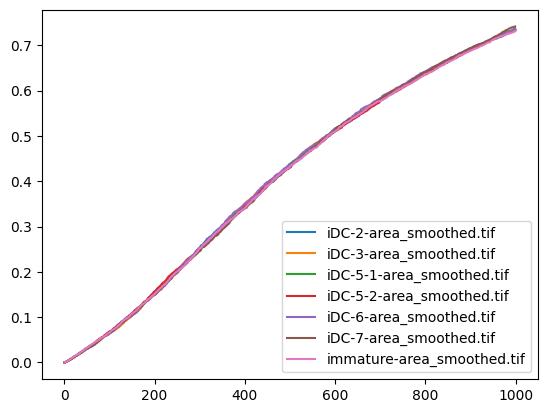

In [5]:
immat_area_evals = compute_evals(r"C:\Users\Kyler\Desktop\UROP\Data\Cell Data\immature_processed\area")
for k in immat_area_evals.keys():
    plt.plot(immat_area_evals[k], label=k)
plt.legend()
plt.show()

iDC-2edge_smoothed.tif
Graph is connected:  True
iDC-3edge_smoothed.tif
Graph is connected:  True
iDC-5-1edge_smoothed.tif
Graph is connected:  True
iDC-5-2edge_smoothed.tif
Graph is connected:  True
iDC-6edge_smoothed.tif
Graph is connected:  True
iDC-7edge_smoothed.tif
Graph is connected:  True
immatureedge_smoothed.tif
Graph is connected:  True


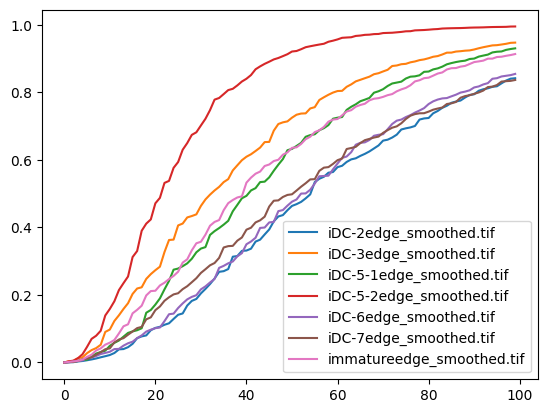

In [6]:
immat_edge_evals = compute_evals(r"C:\Users\Kyler\Desktop\UROP\Data\Cell Data\immature_processed\edges")
for k in immat_edge_evals.keys():
    plt.plot(immat_edge_evals[k], label=k)
plt.legend()
plt.show()

LPS-DC-2-1-area_smoothed.tif
Graph is connected:  True
LPS-DC-2-2-area_smoothed.tif
Graph is connected:  True
LPS-DC-3-area_smoothed.tif
Graph is connected:  True
LPS-DC-4-area_smoothed.tif
Graph is connected:  True
LPS-DC-5-1-area_smoothed.tif
Graph is connected:  True
LPS-DC-5-2-area_smoothed.tif
Graph is connected:  True
mature-area_smoothed.tif
Graph is connected:  True


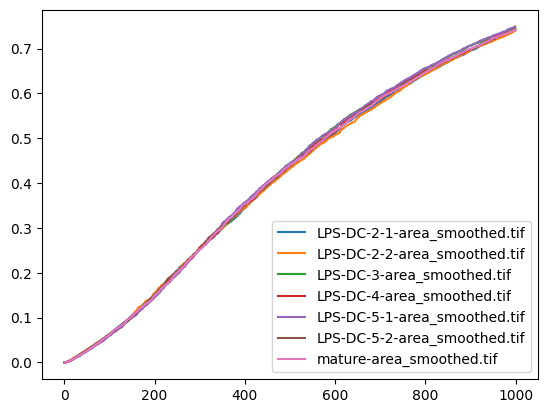

In [18]:
mat_area_evals = compute_evals(r"C:\Users\Kyler\Desktop\UROP\Data\Cell Data\mature_processed\area")
for k in mat_area_evals.keys():
    plt.plot(mat_area_evals[k], label=k)
plt.legend()
plt.show()

LPS-DC-2-1edge_smoothed.tif
Graph is connected:  True
LPS-DC-2-2edge_smoothed.tif
Graph is connected:  True
LPS-DC-3edge_smoothed.tif
Graph is connected:  True
LPS-DC-4edge_smoothed.tif
Graph is connected:  False
LPS-DC-5-1edge_smoothed.tif
Graph is connected:  True
LPS-DC-5-2edge_smoothed.tif
Graph is connected:  True
matureedge_smoothed.tif
Graph is connected:  True


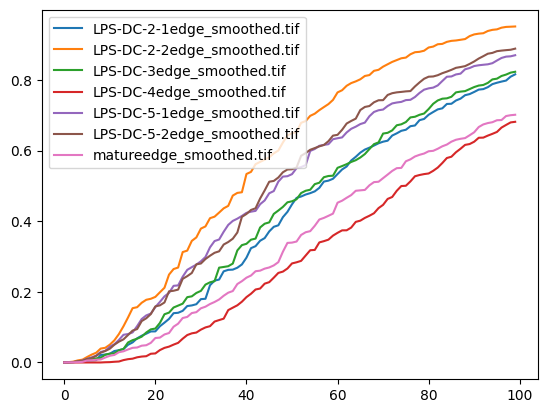

In [8]:
mat_edge_evals = compute_evals(r"C:\Users\Kyler\Desktop\UROP\Data\Cell Data\mature_processed\edges")
for k in mat_edge_evals.keys():
    plt.plot(mat_edge_evals[k], label=k)
plt.legend()
plt.show()

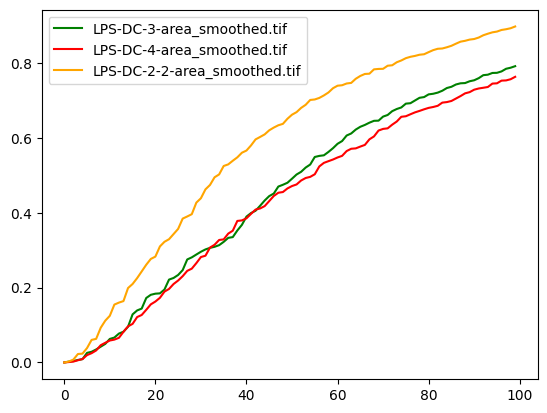

In [13]:
plt.plot(mat_area_evals["LPS-DC-3-area_smoothed.tif"], label="LPS-DC-3-area_smoothed.tif", color="green")
plt.plot(mat_area_evals["LPS-DC-4-area_smoothed.tif"], label="LPS-DC-4-area_smoothed.tif", color="red")
plt.plot(mat_area_evals["LPS-DC-2-2-area_smoothed.tif"], label="LPS-DC-2-2-area_smoothed.tif", color="orange")
plt.legend()
plt.show()

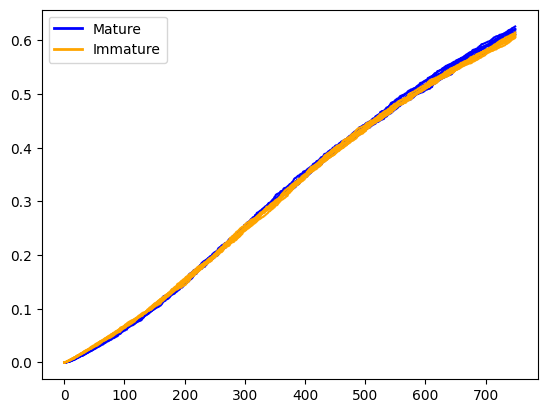

In [28]:
from matplotlib.lines import Line2D
for k in mat_area_evals.keys():
    plt.plot(mat_area_evals[k][:750], color="blue")
for k in immat_area_evals.keys():
    plt.plot(immat_area_evals[k][:750], color="orange")
plt.legend(handles=[Line2D([0], [0], color='b', lw=2, label='Mature'), Line2D([0], [0], color='orange', lw=2, label='Immature')])
plt.show()